## Employee Attrition Prediction using Python

Employees are the backbone of an organization. The onus of performance of an Organization depends to a great extent on the working force of all the factors contributing to the efficeincy of the former. Organizations must deal with the problems when trained, skilled and experienced employees leave an organization for a variety of reasons, which can be dealt with to prevent further misfortune.

### Employee Attrition and Prevention

Downsizing in any organization is a debacle which should be avoided at any cost. It is important to know if there is any distaste within the organization, factors leading to it and ways to overcome it. A well trained and experienced employee leaving the organization is a huge loss and has to be replaced with often a new hire who is going to consume time, money and a lot more for the organization until they make profits to the institution.
Therefore, by predicting a employee's taste in the organization, we can handle the problem significantly.

Here, we will be predicting Employee Attrition with the help of Python libraries and some Machine Learning concepts. We will start by importing the required libraries.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The following dataset has been taken from Kaggle. This dataset describes Employee Attrition for IBM, a leading tech company, the factors leading to the said problem across various domains

In [87]:
#reading the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [88]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [89]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The data has no missing values as can be seen.
Our next step is to find the correlation between features(if any), so as to be aware how the features are related to each other. We will do it by using heatmap, a seaborn module that that spreads out a color coded matrix,  with brighter and darker colors to represent correlation between features.

Firstly, we will separate numerical columns with non numerical ones. Then the numerical features will be checked for correlation amongst them.

In [90]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [91]:
num_df= df[[ u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',]].copy()

In [92]:
num_df.head()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6
1,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10
2,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0
3,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8
4,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2


In [93]:
num_df.shape

(1470, 20)

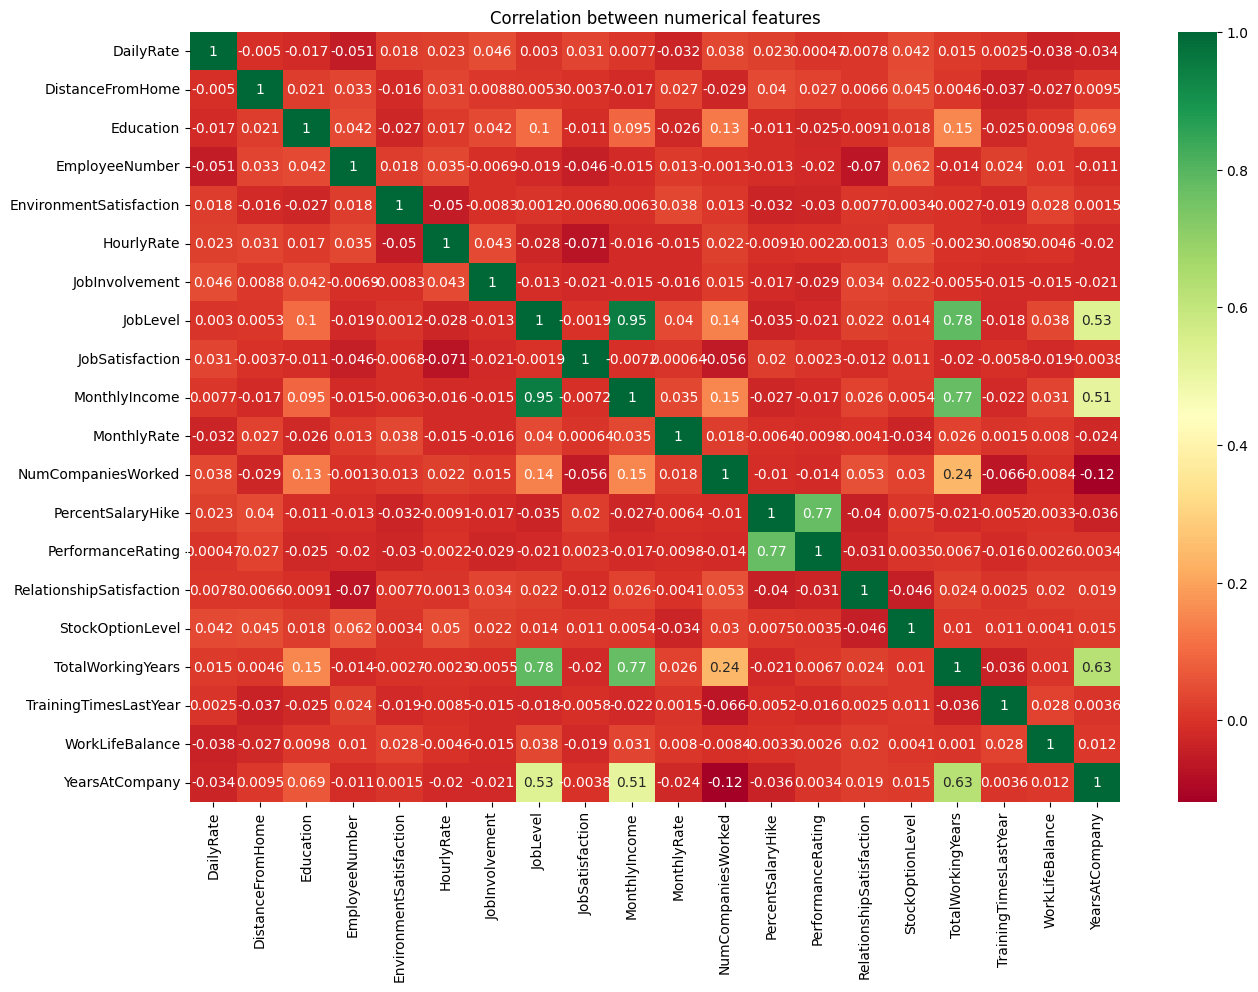

In [94]:
import seaborn as sns

fig= plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation between numerical features")
plt.show()

From the correlation plot, we can see that a lot of our columns appear to be poorly correlated to each other. Generally, when building a predictive model, it would be better to train a model with features that are not too correlated with each other so that we don’t need to deal with redundant features. 

In the case where we have a large number of correlated characteristics, perhaps we could apply a technique such as principal component analysis (PCA) to reduce the characteristic space.

## Feature Engineering

After exploring our dataset, let’s now move on to the task of feature engineering and numerically encoding the categorical values in our dataset. Feature engineering involves creating new features and relationships from the current features that we have.

For this task, we’ll separate the numeric columns from the categorical columns.

In [95]:
df_cat = df.drop([u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears', u'EmployeeCount',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',
             u'StandardHours', u'YearsWithCurrManager'], axis=1)

After identifying which of our features contain categorical data, we can start to digitally encode the data. To do this, we will use Pandas’ get_dummies method in Python which creates dummy variables encoded from the categorical variables.

In [96]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [97]:
df_cat.dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [98]:
df_cat.drop('Attrition', axis=1, inplace=True)
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


The feature set is then obtained by concatenating the numerical and categorical features.

In [99]:
X = pd.concat([num_df, df_cat], axis=1)
X.head()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1102,1,2,1,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,1,0,1
1,279,8,1,2,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,1,0
2,1373,2,2,4,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,1392,3,4,5,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,1,0,1
4,591,2,1,7,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,1,0


In [100]:
X.columns

Index(['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'Jo

In [101]:
target= df[['Attrition']].copy()
target.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [102]:
dic = {'Yes':1, 'No':0}
Y= df["Attrition"].apply(lambda x: dic[x])


In [103]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

## Machine Learning for Employee Attrition

Now, we need to train a Machine Learning model for predicting Employee Attrition prediction with Python. For this task, we will use the Random Forest Classification model provided by Scikit-learn.

But before implementing Machine Learning for prediction of Employee Attrition prediction we need to split the data into a training set and test set.

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 2)
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (1176, 49)
Test data shape: (294, 49)


In [105]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=1000, n_jobs=-1,max_features=0.3, max_depth=4, min_samples_leaf=2, random_state=0,verbose=0)
rf

RandomForestClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2,
                       n_estimators=1000, n_jobs=-1, random_state=0)

In [106]:
rf.fit(X_train, Y_train)
yhat = rf.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score: ", accuracy_score(Y_test, yhat))
print("Classification Report: ", classification_report(Y_test, yhat))

Accuracy Score:  0.8537414965986394
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.98      0.92       246
           1       0.67      0.21      0.32        48

    accuracy                           0.85       294
   macro avg       0.77      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



As observed, our Random Forest returns around 85% accuracy for its predictions. This can be considered a fairly good model considering the accuracy. This model can now be used to make predictions on employee attritions. 